# Cálculo de emisiones de gases de efecto invernadero en el hogar
## Utilizando datos de consumo de electricidad y de gas natural obtenidos de recibos de CFE y Engie
### Autor: Iván Molar Rochín 
### Fecha: Diciembre 2023

#### Definimos el periodo de tiempo que utilizaremos
El cálculo se realizará desde el 1 de enero de 2023 hasta el 30 de octubre de 2023. Esto porque quiero mostrar las emsiones a partir de esta año hasta la fecha en que tengo datos disponibles. 

In [38]:
# Primero importamos Pandas para poder crear nuestra tabla
import pandas as pd

#### Obtención de datos de electricidad
Lo único que tuve que hacer fue revisar los recibos de CFE y dado que son bimestrales, tuve identificar la cantidad en kWh del periodo, dividir entre el número de días del periodo y calcular su correspondiente según el mes.

In [39]:
# Creamos nuestro primer dataframe con los datos de electricidad mensual

datos_electricidad ={ 'Mes':['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre'],
                      'Consumo (kWh)':[73.86, 67.02, 75.24, 73.00, 82.33, 80.66, 85.65, 86.00, 83.65, 86.50]}

tabla_consumo_electrico = pd.DataFrame(datos_electricidad)

In [40]:
tabla_consumo_electrico

,Mes,Consumo (kWh)
0,Enero,73.86
1,Febrero,67.02
2,Marzo,75.24
3,Abril,73.00
4,Mayo,82.33
5,Junio,80.66
6,Julio,85.65
7,Agosto,86.00
8,Septiembre,83.65
9,Octubre,86.50


#### Obtención de datos de gas natural
Estos datos los obtuve de los recibos mensuales de Engie. Lo único que tuve que hacer fue identificar el consumo, dividirlo entre el número de días del periodo y ajustarlo al mes correspondiente. 

In [41]:
# Creamos nuestro segundo dataframe con los datos de gas mensual

datos_gas_natural ={ 'Mes':['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre'],
                      'Consumo (m3)':[10.81, 18.80, 16.83, 17.20, 15.95, 16.89, 13.03, 14.04, 19.42, 14.57]}
tabla_consumo_gas = pd.DataFrame(datos_gas_natural)

In [42]:
tabla_consumo_gas

,Mes,Consumo (m3)
0,Enero,10.81
1,Febrero,18.80
2,Marzo,16.83
3,Abril,17.20
4,Mayo,15.95
5,Junio,16.89
6,Julio,13.03
7,Agosto,14.04
8,Septiembre,19.42
9,Octubre,14.57


#### Calculamos las toneladas de CO₂e para el consumo electrico
Esto se puede conseguir multiplicando los kWh por el factor de emisión del Servicio Eléctrico Nacional para el año 2022 y el factor de conversión de MWh a kWh.

$FEred = (0.435 tCO₂e/MWh)(1 MWh / 1000 KWh)$

In [43]:
# Definimos una función para realizar este cálculo
def calculo_emisiones_electricidad(x):
    emisiones_e = (0.435/1000)*x
    return emisiones_e

In [44]:
# Creamos una nueva columna en la tabla de consumo eléctrico usando la función definida anteriormente en la columna de consumo
tabla_consumo_electrico["tCO₂e"] = tabla_consumo_electrico["Consumo (kWh)"].apply(calculo_emisiones_electricidad)
tabla_consumo_electrico

,Mes,Consumo (kWh),tCO₂e
0,Enero,73.86,0.032129
1,Febrero,67.02,0.029154
2,Marzo,75.24,0.032729
3,Abril,73.00,0.031755
4,Mayo,82.33,0.035814
5,Junio,80.66,0.035087
6,Julio,85.65,0.037258
7,Agosto,86.00,0.037410
8,Septiembre,83.65,0.036388
9,Octubre,86.50,0.037628


#### Correción de unidades
Los valores que obtuvimos para las emisiones son muy pequeños porque están en toneladas, así que voy a convertirlos a kilogramos para que no sean tan pequeños.

In [45]:
# Multiplicamos por 1000 para hacer la conversión de toneladas a kilogramos
tabla_consumo_electrico["tCO₂e"]=tabla_consumo_electrico["tCO₂e"]*1000

In [46]:
# Renombramos la columna de emisiones
tabla_consumo_electrico = tabla_consumo_electrico.rename(columns={'tCO₂e': 'kgCO₂e'})

In [47]:
tabla_consumo_electrico

,Mes,Consumo (kWh),kgCO₂e
0,Enero,73.86,32.12910
1,Febrero,67.02,29.15370
2,Marzo,75.24,32.72940
3,Abril,73.00,31.75500
4,Mayo,82.33,35.81355
5,Junio,80.66,35.08710
6,Julio,85.65,37.25775
7,Agosto,86.00,37.41000
8,Septiembre,83.65,36.38775
9,Octubre,86.50,37.62750


#### Calculamos las tCO₂e para el gas natural
Primero tenemos que calcular el poder calórico. Esto se logra al multiplicar el total del consumo en m³ por el poder calórico neto del gas natural para obtener el resultado en kJ. El poder calórico del gas natural es el siguiente:

$PCgas natural = 39,083 kJ/m³$

Después debemos de dividir el resultrado entre 1,000,000,000 para poder obtener el valor en TJ.

Luego, para obtener la masa de cada uno de los gases de efecto invernadero, debemos de multiplicar el poder calórico por el factor de emisión predeterminado para gas natural de cada tipo de gas y el valor de potencial de calentamiento global del metano y el óxido nitroso.

Los cuales son los siguientes:

$FECO₂ = 56.1 tCO₂/TJ$

$FECH₄ = (0.005 tCH₄/TJ) (28)$

$FEN₂O = (0.0001 tN₂O/TJ) (264)$

Para terminar, hay que sumar estos valores y así obtendremos la toneladas de dióxido de carbono equivalente.

In [48]:
# Definimos la función para obtener las emisiones de CO2 equivalente

def calculo_emisiones_gas(valor):
    poder_calorico = (39083/1000000000)*valor
    emisiones_co2 = poder_calorico * 56.1
    emisiones_ch4 = poder_calorico * 0.005 * 28
    emisiones_n2o = poder_calorico * 0.0001 * 264
    emisiones_gn = emisiones_co2 + emisiones_ch4 + emisiones_n2o
    return emisiones_gn

In [49]:
# Creamos la columna de las emisiones usando la función que definimos un paso atrás aplicada a la columna de consumo
tabla_consumo_gas["tCO₂e"] = tabla_consumo_gas["Consumo (m3)"].apply(calculo_emisiones_gas)
tabla_consumo_gas

,Mes,Consumo (m3),tCO₂e
0,Enero,10.81,0.023772
1,Febrero,18.80,0.041342
2,Marzo,16.83,0.037010
3,Abril,17.20,0.037824
4,Mayo,15.95,0.035075
5,Junio,16.89,0.037142
6,Julio,13.03,0.028654
7,Agosto,14.04,0.030875
8,Septiembre,19.42,0.042706
9,Octubre,14.57,0.032040


#### Correción de unidades
Los valores que obtuvimos para las emisiones también son muy pequeños porque están en toneladas, así que voy a convertirlos a kilogramos para que no sean tan pequeños.

In [50]:
# Multiplicamos por 1000 para hacer la conversión de toneladas a kilogramos
tabla_consumo_gas["tCO₂e"]=tabla_consumo_gas["tCO₂e"]*1000

In [51]:
# Renombramos la columna de emisiones
tabla_consumo_gas = tabla_consumo_gas.rename(columns={'tCO₂e': 'kgCO₂e'})

In [52]:
tabla_consumo_gas

,Mes,Consumo (m3),kgCO₂e
0,Enero,10.81,23.771835
1,Febrero,18.80,41.342323
2,Marzo,16.83,37.010175
3,Abril,17.20,37.823827
4,Mayo,15.95,35.075002
5,Junio,16.89,37.142119
6,Julio,13.03,28.653748
7,Agosto,14.04,30.874798
8,Septiembre,19.42,42.705740
9,Octubre,14.57,32.040300


#### Calculo total de las emisiones por consumo eléctrico y por consumo de gas natural

El siguiente código lo utilizaré para saber cuántos kgCO₂e he emitido durante los meses de enero a octubre a través de mi consumo de electricidad:

In [53]:
emisiones_electricidad = tabla_consumo_electrico["kgCO₂e"].sum()
print(f"Las emisiones totales por consumo de electricidad es: {emisiones_electricidad} kgCO₂e")

Las emisiones totales por consumo de electricidad es: 345.35085 kgCO₂e


El siguiente código lo utilizaré para saber cuántos kgCO₂e he emitido durante los meses de enero a octubre a través de mi consumo de gas natural:

In [54]:
emisiones_gas = tabla_consumo_gas["kgCO₂e"].sum()
print(f"Las emisiones totales por consumo de gas es: {emisiones_gas} kgCO₂e")

Las emisiones totales por consumo de gas es: 346.439866902448 kgCO₂e


El siguiente código lo utilizaré para saber cuántos kgCO₂e totales he emitido durante los meses de enero a octubre a través de mi consumo de electricidad y gas natural:

In [55]:
emisiones_totales = emisiones_electricidad + emisiones_gas
print(f"Las emisiones totales en tu hogar son: {emisiones_totales} kgCO₂e")

Las emisiones totales en tu hogar son: 691.7907169024479 kgCO₂e


#### Visualizaciones

In [56]:
# Importamos las librerías necesarias para realizar las visualizaciones
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Buscamos algún tema que nos guste
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [58]:
# Aplicamos un tema adecuado. En este caso uno accesible para personas con alguna daltonismo
plt.style.use('seaborn-v0_8-colorblind')

In [59]:
# Definimos la columna de mes como índice de nuestro conjunto de datos de las tablas
tabla_consumo_electrico = tabla_consumo_electrico.set_index('Mes')

In [60]:
tabla_consumo_electrico

,Consumo (kWh),kgCO₂e
Mes,,
Enero,73.86,32.12910
Febrero,67.02,29.15370
Marzo,75.24,32.72940
Abril,73.00,31.75500
Mayo,82.33,35.81355
Junio,80.66,35.08710
Julio,85.65,37.25775
Agosto,86.00,37.41000
Septiembre,83.65,36.38775


In [61]:
tabla_consumo_gas = tabla_consumo_gas.set_index('Mes')

In [62]:
tabla_consumo_gas

,Consumo (m3),kgCO₂e
Mes,,
Enero,10.81,23.771835
Febrero,18.80,41.342323
Marzo,16.83,37.010175
Abril,17.20,37.823827
Mayo,15.95,35.075002
Junio,16.89,37.142119
Julio,13.03,28.653748
Agosto,14.04,30.874798
Septiembre,19.42,42.705740


<Axes: title={'center': 'Consumo de electricidad'}, xlabel='Fecha en el 2023', ylabel='kWh'>

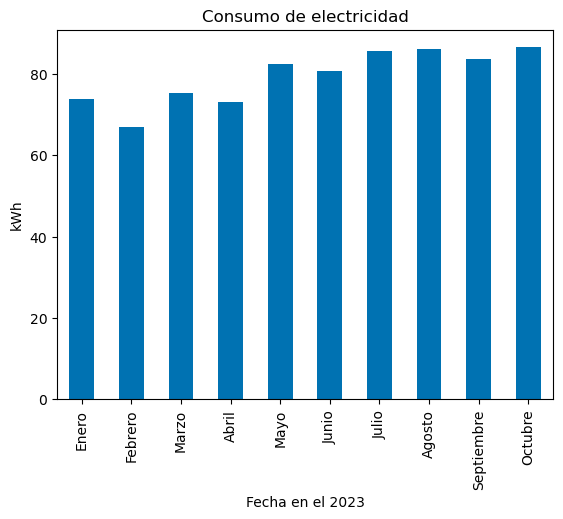

In [63]:
# Creamos la gráfica de barras sobre el consumo eléctrico
tabla_consumo_electrico["Consumo (kWh)"].plot(kind='bar', title='Consumo de electricidad', xlabel='Fecha en el 2023', ylabel='kWh')

<Axes: title={'center': 'Consumo de gas'}, xlabel='Fecha en el 2023', ylabel='m³'>

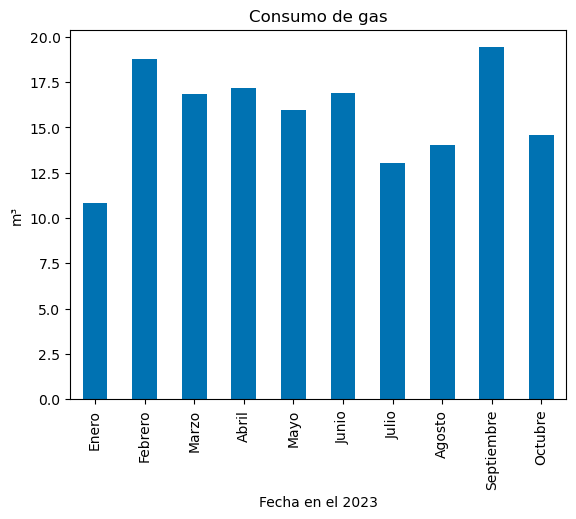

In [64]:
# Ahora graficamos el consumo de gas natural
tabla_consumo_gas["Consumo (m3)"].plot(kind='bar', title='Consumo de gas', xlabel='Fecha en el 2023', ylabel='m³')

Como tenemos dos tablas para las emisiones de kgCO₂e, vamos a crear una sola tabla que contenga los datos de estas emisiones y así poder trabajar con esa tabla.

In [71]:
# Unimos las dos tablas para crear una sola de las emisiones en kgCO2e
#tabla_emisiones = tabla_consumo_electrico.merge(tabla_consumo_gas, how = 'inner', on = 'Mes')

#Arreglamos la tabla cambiando el nombre a algunas columnas y eliminando las que no queremos
#tabla_emisiones = tabla_emisiones.rename(columns={'kgCO₂e_x': 'Emisiones Electricidad'})
#tabla_emisiones = tabla_emisiones.rename(columns={'kgCO₂e_y': 'Emisiones Gas'})
#tabla_emisiones = tabla_emisiones.drop(columns=['Consumo (kWh)'])
#tabla_emisiones = tabla_emisiones.drop(columns=['Consumo (m3)'])

In [72]:
# Creamos una columna nueva con la suma de ambos tipos de emisiones
tabla_emisiones['Emisiones Totales']=tabla_emisiones["Emisiones Electricidad"]+tabla_emisiones["Emisiones Gas"]

In [73]:
tabla_emisiones

,Emisiones Electricidad,Emisiones Gas,Emisiones Totales
Mes,,,
Enero,32.12910,23.771835,55.900935
Febrero,29.15370,41.342323,70.496023
Marzo,32.72940,37.010175,69.739575
Abril,31.75500,37.823827,69.578827
Mayo,35.81355,35.075002,70.888552
Junio,35.08710,37.142119,72.229219
Julio,37.25775,28.653748,65.911498
Agosto,37.41000,30.874798,68.284798
Septiembre,36.38775,42.705740,79.093490


#### Resumen estadístico
Aprovechando la creación de esta tabla haré un resumen estadístico de sus valores en cada columna.

In [83]:
tabla_emisiones.describe()

,Emisiones Electricidad,Emisiones Gas,Emisiones Totales
count,10.000000,10.000000,10.000000
mean,34.535085,34.643987,69.179072
std,2.912618,5.841126,5.780756
min,29.153700,23.771835,55.900935
25%,32.279175,31.166174,68.608306
50%,35.450325,36.042589,69.703687
75%,37.040250,37.653400,70.790420
max,37.627500,42.705740,79.093490


<Axes: title={'center': 'Emisiones de electricidad y gas'}, xlabel='Fecha en el 2023', ylabel='kgCO₂e'>

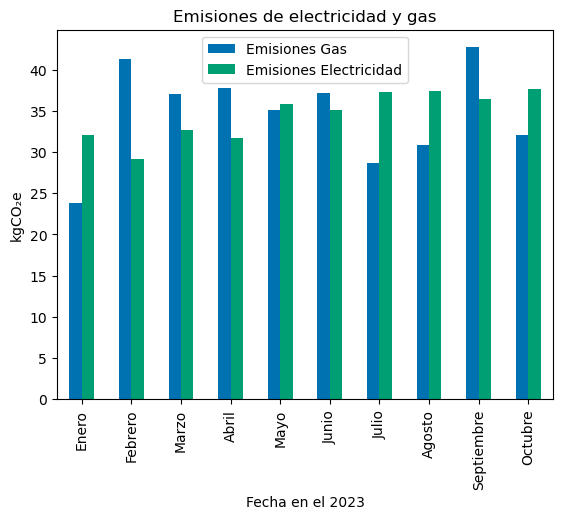

In [77]:
# Comparamos las emisiones de electricidad y de gas en una gráfica
tabla_emisiones.plot(kind='bar', y=['Emisiones Gas', 'Emisiones Electricidad'], title='Emisiones de electricidad y gas', xlabel='Fecha en el 2023', ylabel='kgCO₂e')

<Axes: title={'center': 'Emisiones Totales'}, xlabel='Fecha en el 2023', ylabel='kgCO₂e'>

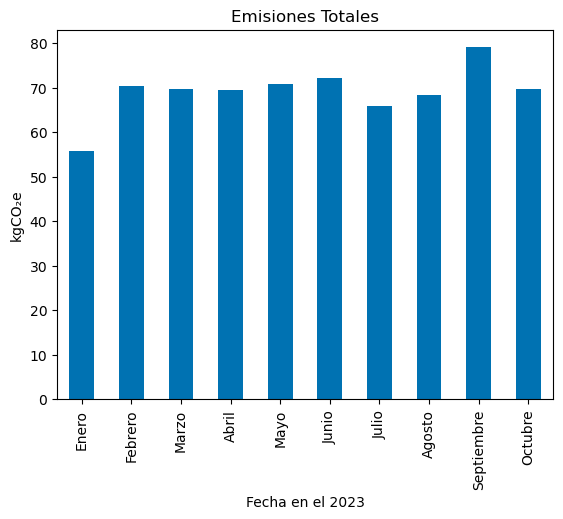

In [76]:
# Graficamos las emisiones totales de kgCO2e por mes
tabla_emisiones['Emisiones Totales'].plot(kind='bar', title='Emisiones Totales', xlabel='Fecha en el 2023', ylabel='kgCO₂e')

### Hallazgos

Con este análisis he descubierto los siguientes puntos sobre las emisiones de GEI en mi hogar:
- Hasta el 31 de octubre de 2023 he emitido un total de **691.79 kgCO₂e**.
- En promedio las emisiones mensuales de mi hogar son de **69.18 kgCO₂e**.
- La emisión mínima es de **55.90 kgCO₂e** y la máxima es de **79.10 kgCO₂e**.
- Comparando las emisiones provenientes del consumo eléctrico y el de gas natural, este ultimo es el que más ha generado, con **346.44 kgCO₂e**, aunque la diferencia únicamente es de aproximadamente 1 kgCO₂e.

### Recomendaciones
Dado que las emisiones totales de mi hogar son de 691.79 kgCO₂e, se me ocurren algunas formas compensar estas emisiones y de minimizarlas en el futuro. 

#### Prácticas de reforestación
 Con base en la información proporcionada por SEMARNAT, se estima que un árbol tiene la capacidad de absorber alrededor de **12 kilogramos de dióxido de carbono anualmente**, aunque este valor puede variar según el tipo de árbol. Dado que mi emisión mensual es de **69.18 kgCO₂e**, la emisión anual alcanzaría aproximadamente los **830.16 kgCO₂e**. Por lo tanto, se requeriría plantar y cuidar alrededor de **70 árboles** para contrarrestar estas emisiones.

Es fundamental tener en cuenta que estos árboles necesitan crecer lo suficiente para alcanzar su máximo potencial de captura de CO₂. No obstante, la plantación de árboles y la restauración de la cobertura vegetal pueden proporcionar beneficios más amplios que la simple captación de carbono. Por lo tanto, esta práctica no solo debería considerarse como una medida de compensación de emisiones, sino también como una estrategia para mejorar la salud de nuestro planeta.

#### Instalación de sistemas fotovoltaicos
Casi la mitad del total de emisiones de gases de efecto invernadero que emití en mi hogar fueron por el consumo de electricidad. Si yo quisiera evitar la generación de esas emisiones, podría optar por instalar algún sistema fotovoltaico en mi hogar.

Mi consumo de electricidad promedio mensual es de **79.39 kWh**, el consumo anual sería de aproximadamente **952.68 kWh**. Por lo tanto diaramente necesitaría generar **2.61 kWh**.

Si quiero generar esa cantidad, entonces podría instalar **2 paneles solares de 400 W**. Dado que vivo en la ciudad de Puebla, el **promedio de horas pico de sol es de 5.5 h**. Además hay que tomar en cuenta que no se generarán los 400 W porque siempre hay un margen de pérdida, así que supongamos que obtenemos el **80% de potencia**. Aplicando la siguiente fórmula:

Potencia Generada = Número de Paneles Solares * Potencia del Panel * Horas Pico de Sol * Porcentaje de Potencia Obtenida

In [89]:
potencia_generada = 2*400*5.5*0.80
#Dividimos entre 1000 para obtener el valor en kWh
potencia_generada = potencia_generada/1000
potencia_generada

3.52

Produciría una potencia diaria de **3.52 kWh**, lo que resulta en una generación anual de **1248.8 kWh** al multiplicar este valor por los 365 días del año. Esto superaría mi consumo de electricidad anual en **332.12 kWh**. Este excedente es estratégico, ya que mi sistema estaría diseñado para generar más de lo que consumo habitualmente, lo que podría ser beneficioso en momentos en los que mi demanda eléctrica sea más alta.

Para optimizar esta instalación, se requeriría una conexión al Sistema Eléctrico Nacional (SEN), acompañada de un medidor bidireccional capaz de distinguir entre la electricidad suministrada por el SEN y la generada por el sistema fotovoltaico conectado a la red.

Ahora bien, como se generarían **1248.8 kWh** de electricidad, es importante calcular a cuántos kgCO₂e equivaldrían si se hubieran generado de forma normal a través de la CFE. Para ello ocuparé la función que se definió párrafos arriba.

In [91]:
emisiones_evitadas = calculo_emisiones_electricidad(1248.8)*1000
emisiones_evitadas

543.228

Estaría evitando la generación de **543.228 kgCO₂e** a la atmósfera. Lo que es igual a la captura anual de aproximadamente **46 árboles**.

Estas son solamente 2 acciones que se podrían aplicar para poder compensar y disminuir la generación de gases de efecto invernadero, pero estoy seguro de que debe de haber otras formas en las que se podría hacer. 

### Referencias
https://sfpya.edomexico.gob.mx/recaudacion/ReadFile.jsp?File=EjemploCalculoEmisionGases.pdf
https://www.ipcc-nggip.iges.or.jp/public/2006gl/pdf/2_Volume2/V2_2_Ch2_Stationary_Combustion.pdf
https://www.gob.mx/cms/uploads/attachment/file/807500/aviso_fesen_2022.pdf
https://www.gob.mx/cms/uploads/attachment/file/809207/lista_combustibles_y_sus_poderes_calorificos_2023.pdf
https://ghgprotocol.org/sites/default/files/2023-03/Guia%20C%26P%20Mexico%20V1.0-Spanish.pdf
https://www.gob.mx/cms/uploads/attachment/file/681992/105_2020_Metodologia_identificacion_500kw_conexion_a_red.pdf
https://autosolar.pe/aspectos-tecnicos/cuantos-kwh-puede-producir-un-panel-solar
https://solarama.mx/blog/calcula-cuantos-paneles-solares-instalar-solarama/